## Grid Search Hyperparameter optimization

This case study is about using grid searches to identify the optimal parameters for a machine learning algorithm. Here we will use the Pima Indian diabetes dataset from Kaggle and KNN. 

First, we load the necessary packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/Users/Hooman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Loading the diabetes data

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Currently, the missing values in the dataset are represented as zeros. We replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan.

In [5]:
diabetes_data['Glucose'].replace(0, np.nan, inplace=True)
diabetes_data['BloodPressure'].replace(0, np.nan, inplace=True)
diabetes_data['SkinThickness'].replace(0, np.nan, inplace=True)
diabetes_data['Insulin'].replace(0, np.nan, inplace=True)
diabetes_data['BMI'].replace(0, np.nan, inplace=True)

Let's plot histograms of each column.

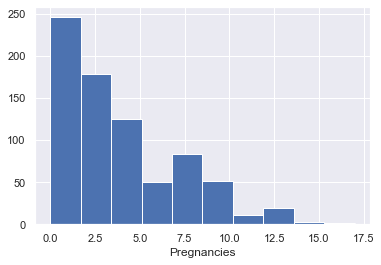

/Users/Hooman/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Hooman/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


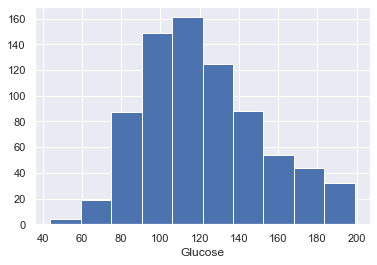

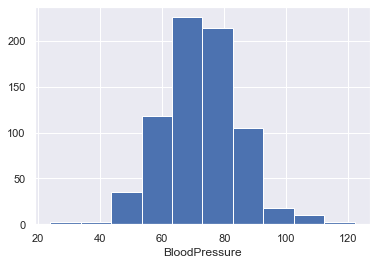

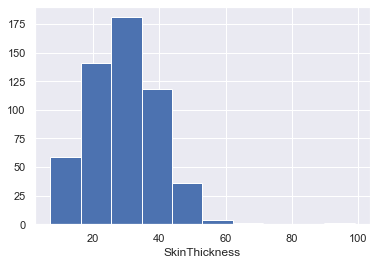

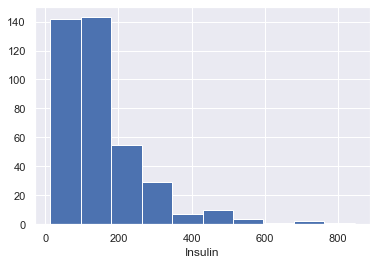

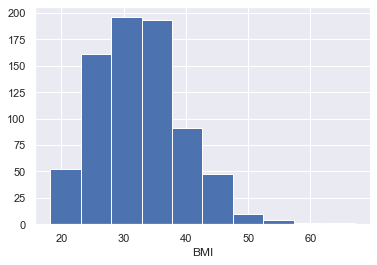

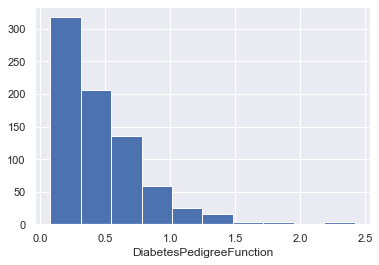

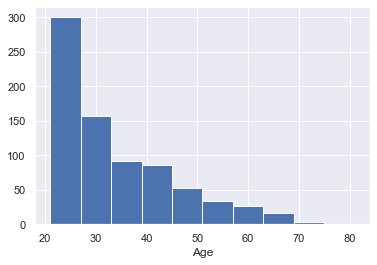

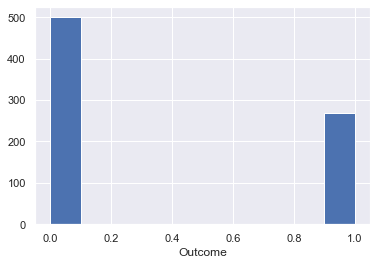

In [6]:
for col in diabetes_data.columns:
    plt.hist(diabetes_data[col])
    plt.xlabel(col)
    plt.show()

#### Replacing zeros with mean and median values.

In [7]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

Let's check the histograms again.

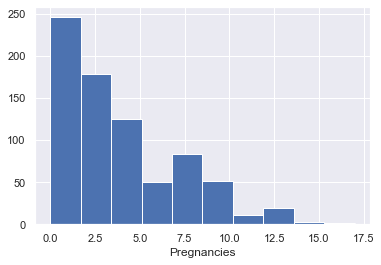

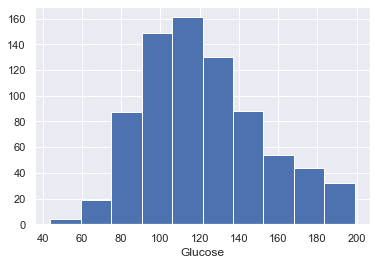

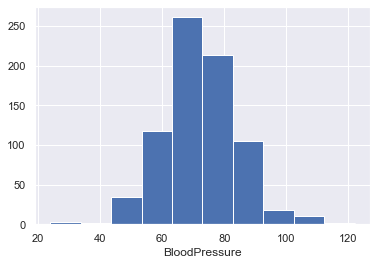

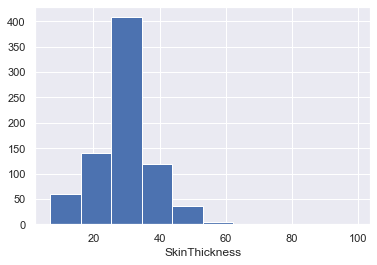

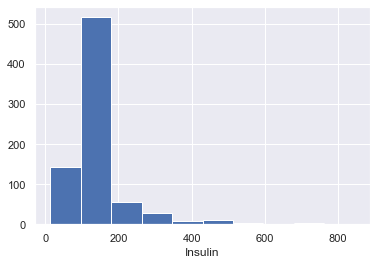

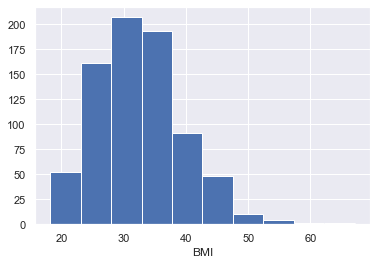

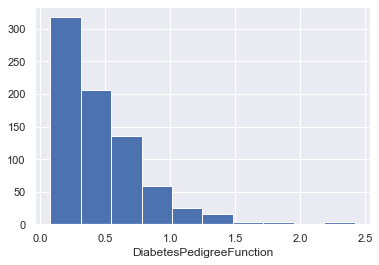

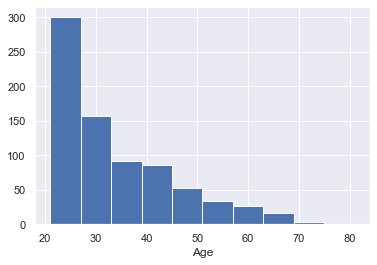

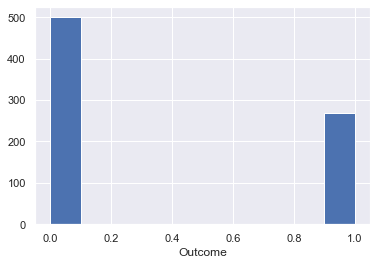

In [8]:
for col in diabetes_data.columns:
    plt.hist(diabetes_data[col])
    plt.xlabel(col)
    plt.show()

#### Plotting the correlation matrix heatmap

Correlation between various features


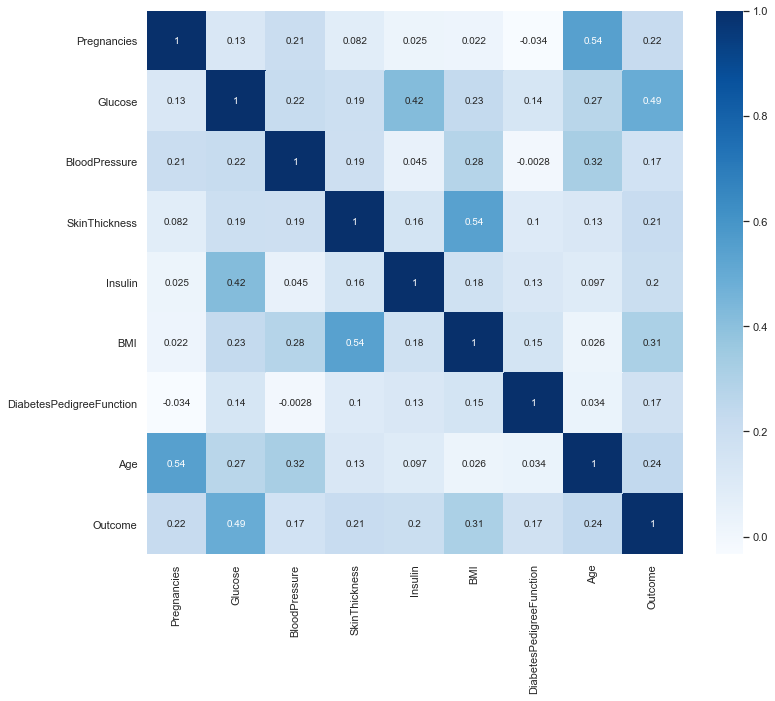

In [9]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

We use Sklearn to standarize the magnitude of the features by scaling the values. Also, define the `y` variable as the `Outcome` column.

In [10]:
X = diabetes_data.drop('Outcome', axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
y = diabetes_data['Outcome']

Next, we create a 70/30 train and test split.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

neighbor_values = list(range(1,10))
for i in neighbor_values:

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

Let's check the train and test scores for each iteration and optimal number of neighbors for training and test datasets.

In [14]:
print("train scores:\n", train_scores)
print("test scores:\n", test_scores)

train scores:
 [1.0, 0.8435754189944135, 0.8547486033519553, 0.8379888268156425, 0.8379888268156425, 0.819366852886406, 0.8324022346368715, 0.819366852886406, 0.819366852886406]
test scores:
 [0.6666666666666666, 0.670995670995671, 0.6666666666666666, 0.683982683982684, 0.7186147186147186, 0.6883116883116883, 0.7056277056277056, 0.7402597402597403, 0.7272727272727273]


In [15]:
print("Optimal number of neighbors for training data:", 
      neighbor_values[train_scores.index(max(train_scores))])

Optimal number of neighbors for training data: 1


In [16]:
print("Optimal number of neighbors for test data:", 
      neighbor_values[test_scores.index(max(test_scores))])

Optimal number of neighbors for test data: 8


We aslo plot the train and test model performance by number of neighbors.

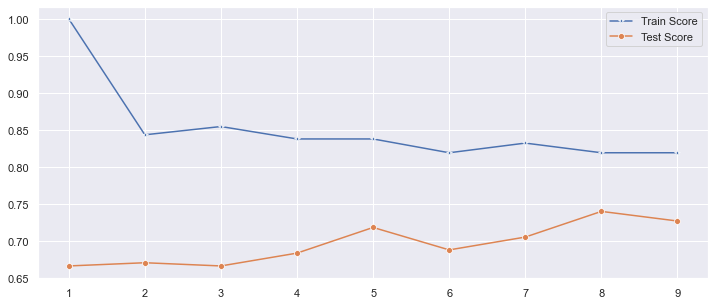

In [17]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

Next we check confusion matrix and classification report on test data for the optimal number of of neighbors.

In [18]:
i = 8
knn = KNeighborsClassifier(i)
knn.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)
print(pl)

[[128  23]
 [ 37  43]]


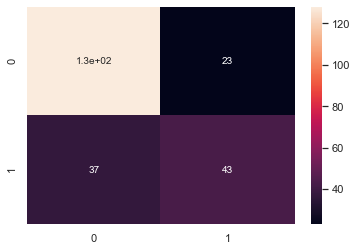

In [19]:
df_cm = pd.DataFrame(pl, index = [i for i in "01"],
                  columns = [i for i in "01"])
#plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.65      0.54      0.59        80

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, we define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### Print the best score and best parameter for n_neighbors.

In [22]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}


Here we can see that the ideal number of n_neighbors for this model is 25 based on the grid search performed. 

Finally, following the KNN example, let's apply this grid search method to find the optimal number of estimators in a Randon Forest model.

In [23]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 150, 200, 250, 300]
}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
rf_cv.fit(X, y)

print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.7643833290892115
Best Parameters: {'n_estimators': 200}
